$$\newcommand{\ket}[1]{\left|{#1}\right\rangle}$$
$$\newcommand{\bra}[1]{\left\langle{#1}\right|}$$

## 4. 練習問題: 

### 1.
Qiskit Aquaを使用して、次の3-SAT問題を解いてください：
$f(x_1,x_2,x_3)=(x_1∨x_2∨¬x_3)∧(¬x_1∨¬x_2∨¬x_3)∧(¬x_1∨x_2∨x_3)$ 。
結果は期待したものでしたか？
***

まず"正直に" 真理値表を書き出し、解を確認しておく。

|$x_1$|$x_2$|$x_3$|$f$|コメント|
|:-|:-|:-|:-|:-|
|0|0|0|1|解|
|0|0|1|0|$f$がFalseなので解ではない|
|0|1|0|1|解|
|0|1|1|1|解|
|1|0|0|0|$f$がFalseなので解ではない|
|1|0|1|1|解|
|1|1|0|1|解|
|1|1|1|0|$f$がFalseなので解ではない|

この3-SAT問題は、5つの充足解を持つことが分かる。

以下、Groverのアルゴリズムを実行し解を探索する。  
  
※ただしQiskit Aquaは現在使用が非推奨となっており、Qiskit Algorithm等への移行が行われている。本回答では以下のドキュメントを参考に、移行後のモジュールで実装を行う。  
【移行ガイド】  
https://qiskit.org/documentation/stable/0.28/aqua_tutorials/Qiskit%20Algorithms%20Migration%20Guide.html  
【Qiskit Tutorials】  
https://qiskit.org/documentation/stable/0.35/tutorials/algorithms/07_grover_examples.html

In [1]:
#必要なモジュールをimportする
import numpy as np
import numpy as np
from qiskit import Aer
from qiskit.utils import QuantumInstance
from qiskit.tools.visualization import plot_histogram
from qiskit.algorithms import Grover, AmplificationProblem
from qiskit.circuit.library.phase_oracle import PhaseOracle

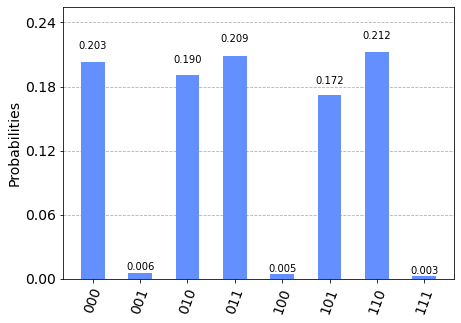

In [2]:
#ここでは、3-SAT問題をブール論理表現の文字列で入力する。(DIMACS-CNF形式のファイルを与えることも可能)
input_3sat = '(x1 | x2 | ~x3) & (~x1 | ~x2 | ~x3) & (~x1 | x2 | x3)'

#Groverインスタンスを生成し、結果を得る。
oracle = PhaseOracle(input_3sat)
problem = AmplificationProblem(oracle, is_good_state=oracle.evaluate_bitstring)
grover = Grover(quantum_instance=QuantumInstance(Aer.get_backend('aer_simulator'), shots=1024))
result = grover.amplify(problem)
display(plot_histogram(result.circuit_results[-1]))

期待する5つの充足解が得られた。 
  
resultの中身を見てみると、4度目の試行で2回のGroverイテレーションに到達し、期待する結果 (good_state) が得られていることが分かる：

In [3]:
print(result)

{   'assignment': '110',
    'circuit_results': [   {   '000': 41,
                               '001': 280,
                               '010': 34,
                               '011': 34,
                               '100': 300,
                               '101': 37,
                               '110': 17,
                               '111': 281},
                           {   '000': 35,
                               '001': 298,
                               '010': 33,
                               '011': 43,
                               '100': 286,
                               '101': 32,
                               '110': 33,
                               '111': 264},
                           {   '000': 34,
                               '001': 316,
                               '010': 34,
                               '011': 25,
                               '100': 268,
                               '101': 29,
                               '110': 30,